In [43]:
import os
from array import array
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipympl
#%matplotlib inline
%matplotlib widget

In [46]:
def calculate_spectrum(signal):
    yf = np.fft.fft(signal)
    yf = np.abs(yf.reshape((len(yf), 1))) / len(signal)
    return yf


def plot_spectrum(signal, figure_counter, title="Amplitude spectrum"):
    spectrum = np.roll(calculate_spectrum(signal), len(signal) // 2)
    yf = 20 * np.log10(spectrum)

    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(-len(spectrum) // 2 + 1, len(spectrum) // 2 + 1)
    x_data = x_data / (len(spectrum) / 2)
    plt.plot(x_data, yf)
    plt.grid(1)
    plt.xlabel('Frequency (semicircles)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    plt.show()
    return yf

def add_freq(sig, f0_to_fsig):
    n = np.arange(0, len(sig), 1)
    j_exp = np.exp(1j * np.pi * f0_to_fsig * n)
    print("complex exp")
    print(j_exp[0 : 20])
    mixer = np.exp(1j * np.pi * f0_to_fsig * n)
    return sig * mixer

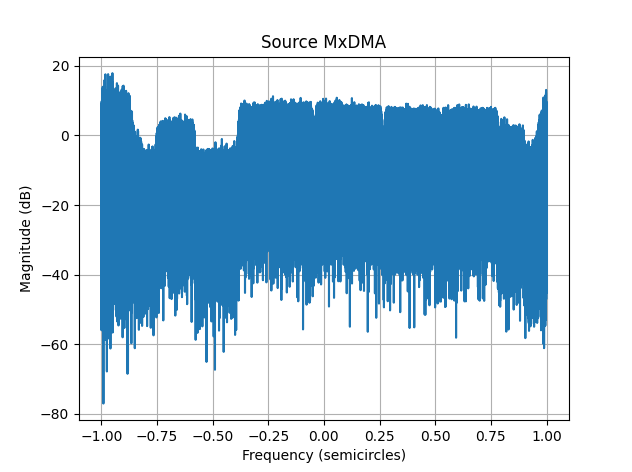

array([[-15.60242146],
       [-21.74131916],
       [-12.72240454],
       ...,
       [-15.01385749],
       [-16.88711576],
       [-11.40121481]])

In [45]:


def read_signal(file_name, data_type):
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    iq_size_in_bytes = 4
    number_of_int_to_read = file_size // iq_size_in_bytes * 2
    arr = array(data_type)
    with open(file_path, 'rb') as fileobj:
        arr.fromfile(fileobj, number_of_int_to_read)
    i = np.array(arr[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(arr[1:: 2])
    q = q.reshape((len(q), 1))
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten

file_path = "/home/xy/Signals/MxDMA/HRC/sig_1264460229_16437329_2024-06-14_14-48-43.pcm"
data_type = 'h'
figure_counter = 0
source_signal_full = read_signal(file_path, data_type)
start_pos = 75177 # [IQ-samples]
used_len = 1643000 #16437329 # [IQ-samples]
source_signal = source_signal_full[int(start_pos):int(start_pos + used_len)]
plot_spectrum(source_signal, 1, "Source MxDMA")

complex exp
[ 1.        +0.j          0.77885654+0.62720212j  0.21323501+0.97700094j
 -0.44669757+0.89468502j -0.90906166+0.41666162j -0.96935966-0.24564577j
 -0.60092256-0.79930725j  0.03329473-0.99944558j  0.6527862 -0.7575422j
  0.98355887-0.18058781j  0.87931631+0.4762382j   0.38616365+0.92243029j
 -0.27778415+0.96064352j -0.81887164+0.57397668j -0.99778292-0.06655254j
 -0.73538786-0.67764644j -0.14774036-0.98902618j  0.50525076-0.86297258j
  0.93477608-0.35523749j  0.95086217+0.3096145j ]


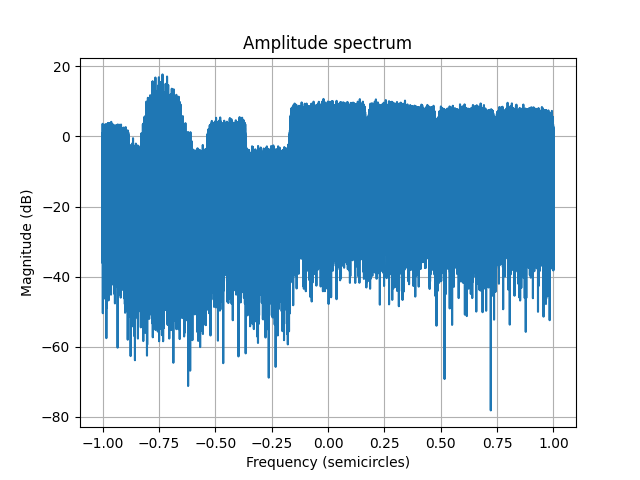

array([[-2.71368644],
       [-4.68553009],
       [-7.67900974],
       ...,
       [-7.5342655 ],
       [-7.44039986],
       [-2.47931322]])

In [47]:
# first subband
left_board = -0.3804
right_board = -0.0512

subcarr_freq = (left_board + right_board) / 2
mixed_sig = add_freq(source_signal, -subcarr_freq)
plot_spectrum(mixed_sig, 2)